                                       REGRESSION ANALYSIS REPORT
                                          Predictive Analysis
                                               Group 5

DECLARATION:

By including this statement, we the authors of this work, verify that:

I hold a copy of this assignment that we can produce if the original is lost or damaged.

I hereby certify that no part of this assignment/product has been copied from any other student’s work or from any other source except where due acknowledgement is made in the assignment.

No part of this assignment/product has been written/produced for us by another person except where such collaboration has been authorised by the subject lecturer/tutor concerned.

I am aware that this work may be reproduced and submitted to plagiarism detection software programs for the purpose of detecting possible plagiarism (which may retain a copy on its database for future plagiarism checking).

I hereby certify that we have read and understand what the School of Computer, Data and Mathematical Sciences defines as minor and substantial breaches of misconduct as outlined in the learning guide for this unit.

                                       ——————————————————————

DATA DESCRIPTION

For the purpose of regression analysis, we are using the "weather.csv" dataset. The measurement of this dataset were recorded by a weather station near Heathrow airport in London, UK.
There are 10 attributes to the data set:
    
1. date - recorded date of measurement

2. cloud_cover - cloud cover measurement in oktas

3. sunshine - sunshine measurement in hours

4. global_radiation - irradiance measurement in Watt per square meter

5. max_temp - maximum temperature recorded in degrees Celsius

6. mean_temp - mean temperature in degrees Celsius

7. min_temp - minimum temperature recorded in degrees Celsius

8. precipitation - precipitation measurement in millimeters

9. pressure - pressure measurement in Pascals

10. snow_depth - snow depth measurement in centimeters


TARGET VARIABLE

A target variable selected is max_temp for which we are going to predict the maximum temperature for the day using three 
different analysis, names, linear regression, logistic regression and the rigid regression analysis. 

QUESTION 1: LINEAR REGRESSION MODEL

A linear regression model is the method to discover the association between a target variable and one or more predictors by fitting a linear equation on observed data. It can either be,

i) A simple Linear Regression
ii) Multiple Linear Regression

In a simple linear regression, there is one target and one predictor variable but in multiple regression tehre are more than one predictors. There are different methods to find the parameters of a linear models, they are, Ordinary Least Square(OLS) method, Gradient Descent method, and using a python libraries with built in functions.

Given below are the steps followed in order to find the parameter of the linear model.

 Step1: Loading and Viewing the dataset
 
 Step2: Data Cleaning and Pre-Processing
 
 Step3: Selecting relevant features using feature selection technique, that is, 
 
 Step3: Spilitting the data into training and test dataset.
 
 Step4: Building a linear regression model using OLS method and Gradient Descent methods on train data set.
 
 Step5: Predicting the target data on train data and test data set.
 
 Step6: Checking the accuracy of the models based on the following factors: R-Squared value and Mean Squared Error (MSE)
 
 Step7: Visualizing the model

In [1]:
#Importing necessary packages
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
#loading and viewing dataset
weather=pd.read_csv("weather.csv")

# Display the first 5 rows of the dataset
print(weather.head())

# Describing the dataset
print(weather.describe())

# Display information about the dataset
print(weather.info())


       date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
0  19790101          2.0       7.0              52.0       2.3       -4.1   
1  19790102          6.0       1.7              27.0       1.6       -2.6   
2  19790103          5.0       0.0              13.0       1.3       -2.8   
3  19790104          8.0       0.0              13.0      -0.3       -2.6   
4  19790105          6.0       2.0              29.0       5.6       -0.8   

   min_temp  precipitation  pressure  snow_depth  
0      -7.5            0.4  101900.0         9.0  
1      -7.5            0.0  102530.0         8.0  
2      -7.2            0.0  102050.0         4.0  
3      -6.5            0.0  100840.0         2.0  
4      -1.4            0.0  102250.0         1.0  
               date   cloud_cover      sunshine  global_radiation  \
count  1.534100e+04  15322.000000  15341.000000      15322.000000   
mean   1.999567e+07      5.268242      4.350238        118.756951   
std    1.212176e+05     

DATA CLEANING AND PRE-PROCESSING

In this step, we checked for missing values and dropped the rows with missing values.

In [3]:
#Checking for null values
weather.isnull().sum()

date                   0
cloud_cover           19
sunshine               0
global_radiation      19
max_temp               6
mean_temp             36
min_temp               2
precipitation          6
pressure               4
snow_depth          1441
dtype: int64

This shows that except date column all other attributes have missing values.

In [4]:
#Dropping the rows with NA values
weather.dropna(inplace=True)

In [ ]:
#Converting date column values to appropriate date format
#weather['date']=pd.to_datetime(weather['date'],format='%Y%m%d')
#weather.head(15)

In [ ]:
cor_matrix=weather.corr()
plt.figure(figsize=(8,8))
sns.heatmap(cor_matrix,annot=True,cmap='coolwarm',center=0)
plt.title("Heatmap for Correlation Matrix of Weather data")
plt.show()

This heatmap reveals how strongly or weakly two attributes are related.


SETTING TARGET VARIABLE (y) and PREDICTORS (X)

In order to select the target variable we mention the name of the column from the weather dataset and store the values in y variable

In [ ]:
#setting target variable in y

y = weather["max_temp"]  # Target variable
y




SETTING LIST OF PREDICTORS IN X

In order to set list of predictor in X, we drop the column that we have set as our target variable from the weather dataset.

In [ ]:
#Dropping columns that are not relevant as predictors
X=weather.drop(columns=['max_temp'])
X

DATA SCALING

At this stage, we transform our data to have zero mean and variance of 1. This is done to normalize the data so that there wont be a vast difference in magnitudes in teh variables.

In [ ]:
#Data Scaling
# Standardize features (mean=0, variance=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

FEATURE SELECTION

The best features to predict max_temp of the day is selected using the technique called SelectKBest and f_regression

In [ ]:
#Select relevant features using SelectKBest and f_regression
num= 7  #number of features to select out of 9 available features
selector = SelectKBest(score_func=f_regression, k=num)
X_final = selector.fit_transform(X_scaled, y)
X_final

DIVIDING THE DATASET

For the purpose of building the models, split the dataset into train and test dataset. Then the model is build on train dataset and prediction is done on both train and test set. Splitting is done using Scikit-learn package train_test_split function. 80 percentage of the data is used as train data while remaining 20 percentage as test data.

In [ ]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

QUESTION 1 (METHOD1): LINEAR MODEL USING LINEAR REGRESSION FUNCTION (OLS)  in SCIKIT-LEARN

In [ ]:
#Building linear model
model1 = LinearRegression()
model1.fit(x_train, y_train)
model1.intercept_, model1.coef_

#predicting y values on train dataset
y1_pred=model1.predict(x_train)

#predicting y values on test dataset
y2_pred=model1.predict(x_test)

# Calculate Mean Squared Error (MSE) for prediction on train dataset
mse_train = mean_squared_error(y_train, y1_pred)

# Calculate R-squared for prediction on train dataset
r2_train = r2_score(y_train, y1_pred)

print("Mean Squared Error on train dataset is:", mse_train)
print("R-squared on train dataset is:", r2_train)


# Calculate Mean Squared Error (MSE) for prediction on test dataset
mse_test = mean_squared_error(y_test, y2_pred)

# Calculate R-squared for prediction on test dataset
r2_test = r2_score(y_test, y2_pred)

print("Mean Squared Error on test dataset is:", mse_test)
print("R-squared on test dataset is:", r2_test)




The above results shows that in both train and test dataset, the model is able to explain 87 percentage of the variance. In addition, the MSE for train data is 5.41 and for test data is 5.43 which are a small difference therefore, it can be said that model performs well and model predictors aligns well with the true values. 

LINEAR MODEL PLOT

In [ ]:



plt.figure(figsize=(10, 6))

# Plotting the training data predictions
plt.scatter(y_train, y1_pred, color='blue', label='Training Data')
# Plotting the test data predictions
plt.scatter(y_test, y2_pred, color='green', label='Test Data')

# Plotting the regression line
plt.plot([min(y), max(y)], [min(y), max(y)], linestyle='--', color='red', label='Regression Line')

plt.xlabel('True Max Temperature')
plt.ylabel('Predicted Max Temperature')
plt.title('Linear Regression Model: True vs. Predicted Max Temperature')
plt.legend()
plt.show()






QUESTION 1 (METHOD 2): LINEAR MODEL USING GRADIENT DESCENT METHOD

In [ ]:
# Implementing gradient descent for linear regression
learning_rate = 0.01
num_iterations = 1000
num_features = x_train.shape[1]
theta = np.random.randn(num_features)

for iteration in range(num_iterations):
    gradient = -2 * x_train.T.dot(y_train - x_train.dot(theta)) / len(y_train)
    theta -= learning_rate * gradient

# Step 6: Plot the linear model
y3_pred = x_train.dot(theta)
y4_pred = x_test.dot(theta)

plt.figure(figsize=(10, 6))

# Plotting the training data predictions
plt.scatter(y_train, y3_pred, color='blue', label='Training Data')
# Plotting the test data predictions
plt.scatter(y_test, y4_pred, color='red', label='Test Data')

# Plotting the regression line
plt.plot([min(y), max(y)], [min(y), max(y)], linestyle='--', color='green', label='Regression Line')

plt.xlabel('True Max Temperature')
plt.ylabel('Predicted Max Temperature')
plt.title('Linear Regression Model (Gradient Descent): True vs. Predicted Max Temperature')
plt.legend()
plt.show()

# Print the model's performance metrics
train_mse = mean_squared_error(y_train, y3_pred)
train_r2 = r2_score(y_train, y3_pred)
test_mse = mean_squared_error(y_test, y4_pred)
test_r2 = r2_score(y_test, y4_pred)

print("Mean Squared Error on train dataset:", train_mse)
print("R-squared on train dataset:", train_r2)
print("Mean Squared Error on test dataset:", test_mse)
print("R-squared on test dataset:", test_r2)

It can be noted that the MSE obtained on train and test data is high and the R-squared value is negative which means the linear model build using gradient descent is not performing well on the given dataset.

QUESTION 2: LOGISTIC REGRESSION

Logistic regression is performed when the target variable is categorical but in our case the dependent variable "max_temp" is continuous or numerical so to perform the logistic regression we first need to transform the variable "max_temp" to categorical.
Logistic regression can be 

i)Binary Classification Logistic Regression

ii)Multinomial Classification Logistic Regression

BINARY CLASSIFICATION 

The target variable has only two possible outcomes which is 0 and 1 in our case. To achieve this we first fixed a threshhold value which is half the highest value in the column "max_temp". Then we compare each y-values with the threshold and assign 1 to it if above threshold value and assign 0 to it if less than the threshold. Then we split the data into train and test set and build logistic regression model on it.

In [ ]:
# Set a threshold to convert temperature values into binary classes
threshold = 19 
y_binary = (y > threshold).astype(int)  # 1 if above threshold, 0 otherwise
y_binary





In [ ]:
#Split the dataset into train and test data
x_train, x_test, y_train, y_test = train_test_split(X_final, y_binary, test_size=0.2, random_state=42)

In [ ]:
# Create a logistic regression model for dataset 
model2 = LogisticRegression()
model2.fit(x_train,y_train)
y5=model2.predict(x_train)
y6=model2.predict(x_test)



In [ ]:
conf_matrix1 = confusion_matrix(y_train,y5)
conf_matrix2 = confusion_matrix(y_test,y6)
accuracy1 = accuracy_score(y_test, y6)
accuracy2=accuracy_score(y_train,y5)
classification_rep1 = classification_report(y_train, y5)
classification_rep2 = classification_report(y_test, y6)

print("Confusion Matrix of a model on tain data:\n", conf_matrix1)
print("Confusion Matrix of a model on test data:\n", conf_matrix2)
print("Accuracy on test data :", accuracy1)
print("Accuracy on train data :", accuracy2)
print("Classification Report on train data:\n", classification_rep1)
print("Classification Report on test data:\n", classification_rep2)


This shows that the accuracy of the model on test data and train data is almost same, that is, 92%. And the confusion matrix obtained for test data reveals that the False Postive (108) and False Negavtive (119) values are very less indicating a model to be perform well in predicting the target varibale.

MULTINOMIAL CLASSIFICATION LOGISTIC REGRESSION

As said in multinomial logistic regression, the target variable may have more than two possible outcomes. In our case, "max_temp" may be categorised as cold, moderate, or hot temperature. Therefore, again before we could build the model, we convert the "max_temp" variable which is continuous to discrete categories and then use it to build the logistic model. In order to do so, 

First we divide the temperature into three categories as cold, moderate and hot.

Secondly, we utilize the library function pd.cut() to set up three bins to store different temperature values and then assign temperature categories to each bins based on their range of temperature values.

In [ ]:
temp_categories = ["cold", "moderate", "hot"] # categorize temperature into three categories

y_multinomial = pd.cut(y, bins=[-np.inf, 17, 30, np.inf], labels=temp_categories)


In [ ]:
#Split the dataset into train and test data
x_train, x_test, y_train, y_test = train_test_split(X_final, y_multinomial, test_size=0.2, random_state=42)

In [ ]:
#Build the multinomial logistic regression model
model3 = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model3.fit(x_train, y_train)

# Predict the temperature values
y7= model3.predict(x_train)
y8 = model3.predict(x_test)

conf_matrix_train = confusion_matrix(y_train, y7)
conf_matrix_test = confusion_matrix(y_test, y8)
classification_rep_train = classification_report(y_train, y7)
classification_rep_test = classification_report(y_test, y8)
accuracy_train = accuracy_score(y_train, y7)
accuracy_test=accuracy_score(y_test,y8)

print("Confusion Matrix for train data:\n", conf_matrix_train)
print("Confusion Matrix for test data:\n", conf_matrix_test)
print("Classification Report of the model on train data:\n", classification_rep_train)
print("Classification Report of the model on train data:\n", classification_rep_test)
print("Accuracy on test data :", accuracy_test)
print("Accuracy on train data :", accuracy_train)









This shows that for both train and test dataset, the model performs well with accuracy of 91% in predicting the true values of max_temp

QUESTION3: RIDGE REGRESSION

In [5]:
# Common imports
import numpy as np
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
# to make this notebook's output stable across runs
np.random.seed(47)
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [6]:
X_dummy = pd.get_dummies(data=weather, drop_first=True)
X_dummy.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [8]:
X_dummy = X_dummy.drop(['max_temp'],1)
X_dummy

C:\Users\Anup Gupta\AppData\Local\Temp\ipykernel_16288\1700958527.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_dummy = X_dummy.drop(['max_temp'],1)


,date,cloud_cover,sunshine,global_radiation,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...
14970,20191227,8.0,0.0,12.0,7.5,6.6,0.0,102880.0,0.0
14971,20191228,8.0,0.0,12.0,8.1,6.6,0.0,103630.0,0.0
14972,20191229,6.0,2.2,29.0,8.7,7.4,0.0,103360.0,0.0
14973,20191230,0.0,3.6,37.0,6.5,1.5,0.0,102970.0,0.0


In [9]:

y = np.c_[weather["max_temp"]]

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_dummy)
lin_reg_2b = LinearRegression()
lin_reg_2b.fit(X_scaled, y)
print(lin_reg_2b.coef_)

[[ 0.03141202 -0.24289135 -1.01284618  1.09026265  9.50236147 -4.08818351
  -0.12500928  0.27914072  0.0160878 ]]


TUNING RIDGE HYPERPARAMETER and BUILDING RIDGE REGRESSION MODEL

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error

ridge_coef = []
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_dummy, y, test_size=0.2, random_state=42)


# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a range of alpha values for cross-validation
alphas = [0.01, 0.1, 1, 10, 100]  # You can adjust this range




# Build ridge regression model with cross-validation
ridge_model = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_model.fit(X_train_scaled, y_train)



# Find the best alpha based on cross-validation results
best_alpha = ridge_model.alpha_
print("Best alpha:", best_alpha)

# Predict using the best model
y_pred_train = ridge_model.predict(X_train_scaled)
y_pred_test = ridge_model.predict(X_test_scaled)

# Calculate mean squared error
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# Calculate R² for training and test sets
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
print("Mean Squared Error for train data is:", mse_train)
print("Mean Squared Error for test data is:", mse_test)

print("R-Squared for train data is:", train_r2)
print("R-Squared for test data is:", test_r2)

Best alpha: 0.01
Mean Squared Error for train data is: 5.394267560820061
Mean Squared Error for test data is: 5.413938201858678
R-Squared for train data is: 0.8722461782252111
R-Squared for test data is: 0.8741042549163085


This shows that the best hyperparameter (alpha) for the Ridge Regression model, as determined through hyperparameter tuning, is 0.01. The result signifies that the Ridge Regression model with an alpha value of 0.01 has good predictive performance. The model doesn't appear to overfit the training data, as the test performance (test MSE and test R²) is similar to the training performance, indicating that the model generalizes well to new data.

D:\DikshApps\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
D:\DikshApps\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
D:\DikshApps\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
D:\DikshApps\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
D:\DikshApps\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


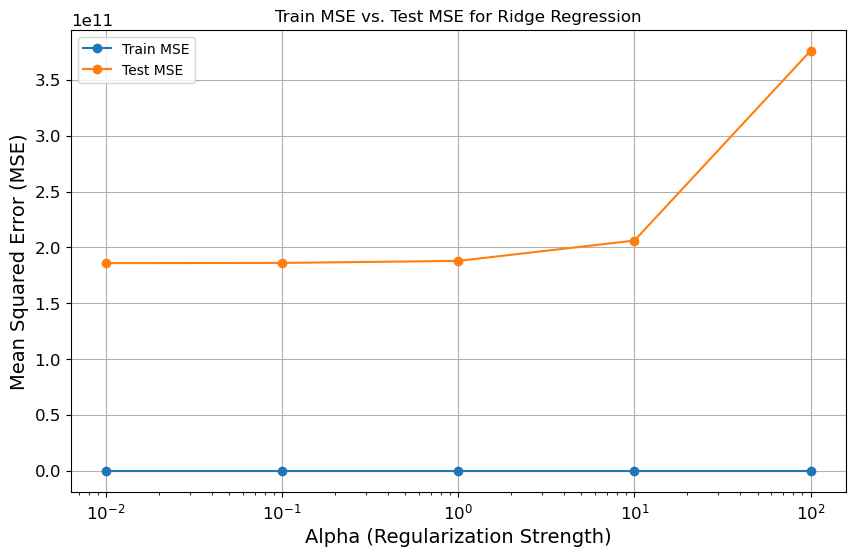

In [43]:
#defining empty list for train and test MSE
mse_train=[]
mse_test=[]

for alpha in alphas:
    # Create a Ridge Regression model with the current alpha
    ridge_model = Ridge(alpha=alpha)

    # Fit the model to the training data
    ridge_model.fit(X_train_scaled, y_train)

    # Make predictions on both the training and test data
    y_train_pred = ridge_model.predict(X_train_scaled)
    y_test_pred = ridge_model.predict(X_test)

    # Calculate MSE for training and test sets
    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_test.append(mean_squared_error(y_test, y_test_pred))

# Plot train MSE vs. test MSE
plt.figure(figsize=(10, 6))
plt.plot(alphas, mse_train, label='Train MSE', marker='o')
plt.plot(alphas, mse_test, label='Test MSE', marker='o')
plt.title('Train MSE vs. Test MSE for Ridge Regression')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Squared Error (MSE)')
plt.xscale('log')  # Use a logarithmic scale for alpha values
plt.legend()
plt.grid(True)
plt.show()





